# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.5.2
* IPython 5.0.0
* pandas 0.18.0
* matplotlib 1.5.1
* netcdf4 1.2.1
* siphon 0.4.0

It should work with other Python and Pandas versions. It requires pvlib >= 0.3.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015, January 2016, April 2016, July 2016

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

/Users/holmgren/git_repos/pvlib-python/pvlib/forecast.py:22: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'module, or the module may be separated into its own package.')


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'US/Arizona'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=7) # 7 days from today
print(start, end)

2016-07-27 00:00:00-07:00 2016-08-03 00:00:00-07:00


## GFS (0.5 deg)

In [4]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP 

In [5]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [6]:
# retrieve data
data = fm.get_data(latitude, longitude, start, end)

In [7]:
data

,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2016-07-27 09:00:00-07:00,0.0,301.600006,0.0,0.0,20.0,17.0,0.0,7.0,1.0,-0.78,0.61
2016-07-27 12:00:00-07:00,0.0,300.600006,0.0,0.0,25.0,22.0,0.0,6.0,3.2,0.51,3.19
2016-07-27 15:00:00-07:00,70.0,305.500000,0.0,0.0,99.0,96.0,0.0,77.0,1.8,1.45,0.39
2016-07-27 18:00:00-07:00,377.0,319.200012,0.0,0.0,68.0,64.0,0.0,44.0,4.2,1.96,-3.74
2016-07-27 21:00:00-07:00,960.0,322.200012,0.0,0.0,25.0,25.0,0.0,0.0,5.6,3.02,-5.07
2016-07-28 00:00:00-07:00,835.0,316.600006,0.0,0.0,20.0,20.0,0.0,0.0,5.1,1.58,-5.09
2016-07-28 03:00:00-07:00,151.0,305.399994,0.0,31.0,22.0,21.0,0.0,1.0,3.0,1.36,-2.70
2016-07-28 06:00:00-07:00,75.0,303.200012,0.0,0.0,44.0,43.0,0.0,0.0,3.7,-3.36,-1.62
2016-07-28 09:00:00-07:00,0.0,301.399994,0.0,0.0,66.0,66.0,0.0,0.0,2.0,-1.52,1.35
2016-07-28 12:00:00-07:00,0.0,299.899994,0.0,0.0,68.0,68.0,0.0,0.0,1.5,-0.53,1.41


In [8]:
data = fm.process_data(data)

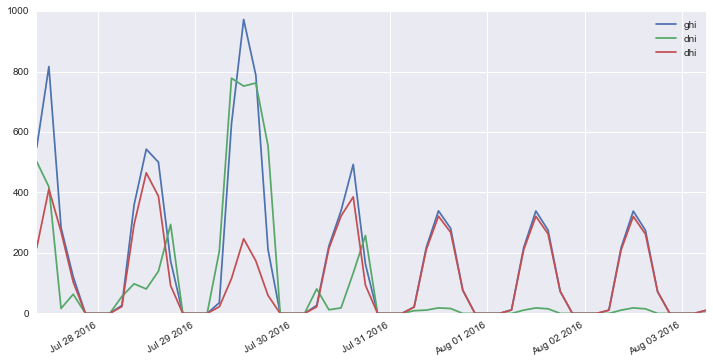

In [9]:
data[['ghi', 'dni', 'dhi']].plot()

In [10]:
cs = fm.location.get_clearsky(data.index)

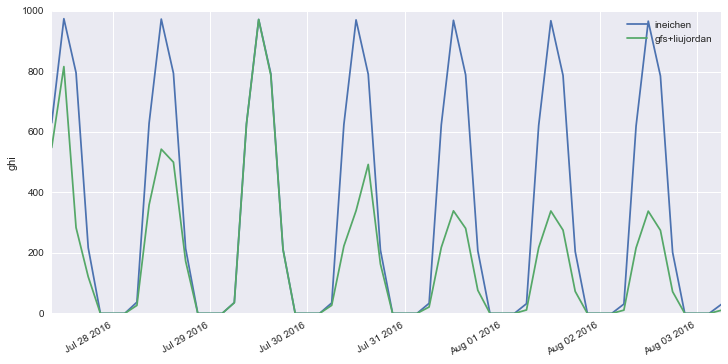

In [11]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
data['ghi'].plot(ax=ax, label='gfs+liujordan')
ax.set_ylabel('ghi')
ax.legend()

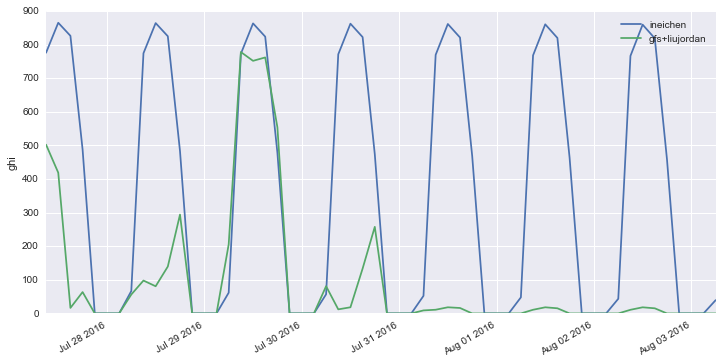

In [12]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='gfs+liujordan')
ax.set_ylabel('ghi')
ax.legend()

In [13]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [14]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-07-27 09:00:00-07:00,28.450012,0.990202,548.587787,502.227154,216.961676,20.0,0.0,7.0,17.0
2016-07-27 12:00:00-07:00,27.450012,3.230511,816.331724,418.898830,411.426625,25.0,0.0,6.0,22.0
2016-07-27 15:00:00-07:00,32.350006,1.501533,283.790254,16.471511,270.478981,99.0,0.0,77.0,96.0
2016-07-27 18:00:00-07:00,46.050018,4.222464,121.211075,63.614451,103.558867,68.0,0.0,44.0,64.0
2016-07-27 21:00:00-07:00,49.050018,5.901297,0.000000,0.000000,0.000000,25.0,0.0,0.0,25.0
2016-07-28 00:00:00-07:00,43.450012,5.329587,0.000000,0.000000,0.000000,20.0,0.0,0.0,20.0
2016-07-28 03:00:00-07:00,32.250000,3.023177,0.000000,0.000000,0.000000,22.0,0.0,1.0,21.0
2016-07-28 06:00:00-07:00,30.050018,3.730147,26.708513,56.339306,22.939529,44.0,0.0,0.0,43.0
2016-07-28 09:00:00-07:00,28.250000,2.032954,359.055341,97.910661,294.532069,66.0,0.0,0.0,66.0
2016-07-28 12:00:00-07:00,26.750000,1.506320,543.173757,80.878427,465.073260,68.0,0.0,0.0,68.0


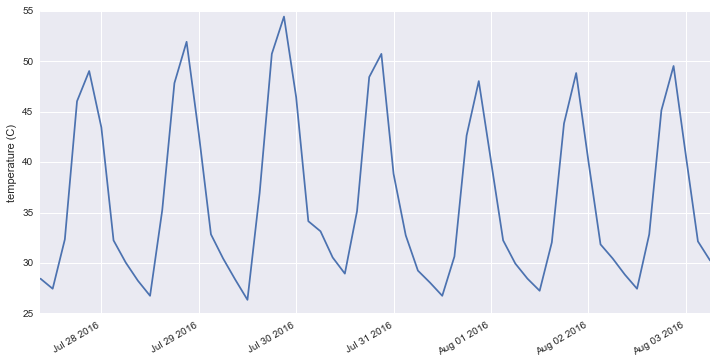

In [15]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air'])

In [16]:
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

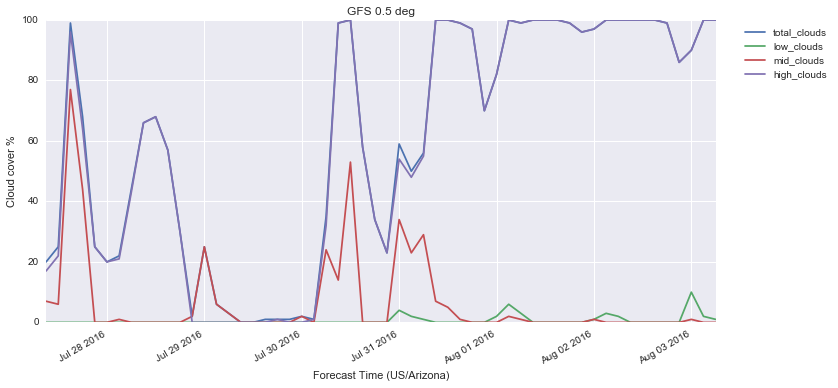

In [17]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [18]:
total_cloud_cover = data['total_clouds']

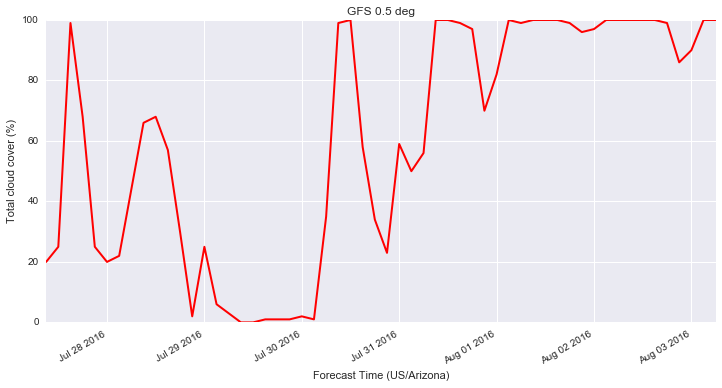

In [19]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')

## GFS (0.25 deg)

In [20]:
# GFS model at 0.25 degree resolution
fm = GFS(resolution='quarter')

In [22]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

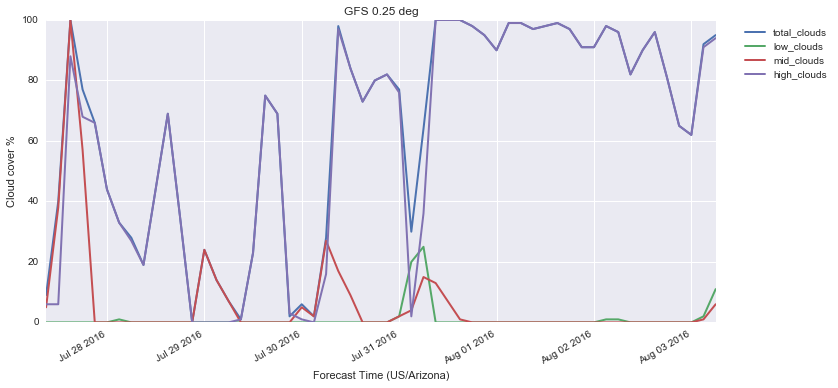

In [23]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [24]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-07-27 09:00:00-07:00,29.550018,0.997246,593.672839,649.421406,164.852746,9.0,0.0,5.0,6.0
2016-07-27 12:00:00-07:00,29.750000,1.371787,721.296120,250.902795,478.774983,40.0,0.0,38.0,6.0
2016-07-27 15:00:00-07:00,32.550018,1.530555,278.615953,15.616103,265.995968,100.0,0.0,100.0,88.0
2016-07-27 18:00:00-07:00,47.649994,3.052212,108.503470,31.012757,99.897821,77.0,0.0,57.0,68.0
2016-07-27 21:00:00-07:00,49.850006,4.948626,0.000000,0.000000,0.000000,66.0,0.0,0.0,66.0
2016-07-28 00:00:00-07:00,44.550018,4.666926,0.000000,0.000000,0.000000,44.0,0.0,0.0,44.0
2016-07-28 03:00:00-07:00,33.550018,2.514617,0.000000,0.000000,0.000000,33.0,1.0,0.0,33.0
2016-07-28 06:00:00-07:00,31.250000,2.960828,30.598827,113.618747,22.997966,28.0,0.0,0.0,27.0
2016-07-28 09:00:00-07:00,29.149994,1.416616,551.159407,515.370371,211.529558,19.0,0.0,0.0,19.0
2016-07-28 12:00:00-07:00,27.550018,2.625052,695.028812,217.769141,484.739384,44.0,0.0,0.0,44.0


## NAM

In [25]:
fm = NAM()

In [26]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

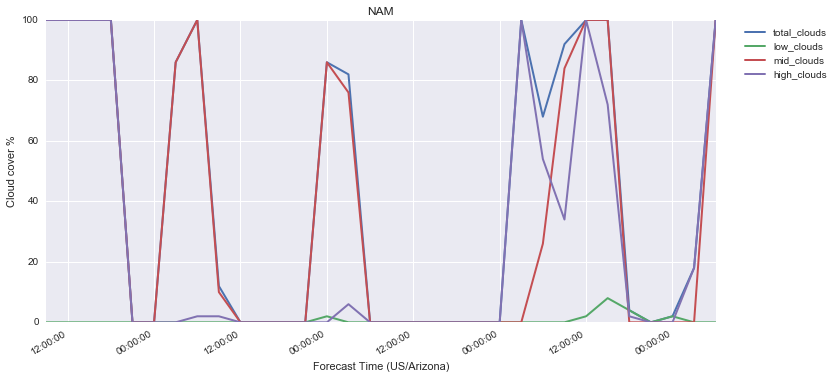

In [27]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0))

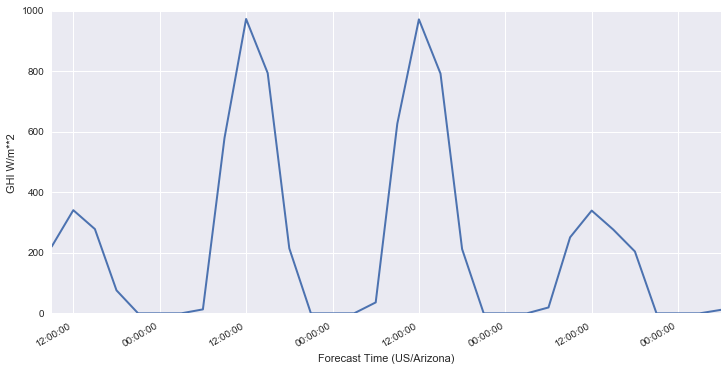

In [28]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

In [29]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-07-27 09:00:00-07:00,29.048981,2.065518,220.696231,11.387513,213.176931,100.0,0.0,100.0,100.0
2016-07-27 12:00:00-07:00,27.885406,1.924674,341.153560,18.433557,323.335794,100.0,0.0,100.0,100.0
2016-07-27 15:00:00-07:00,33.920807,0.736886,278.615953,15.616103,265.995968,100.0,0.0,100.0,100.0
2016-07-27 18:00:00-07:00,45.455719,1.573460,76.028455,0.000000,76.028455,100.0,0.0,100.0,100.0
2016-07-27 21:00:00-07:00,48.816315,2.790556,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-07-28 00:00:00-07:00,43.666168,2.557873,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-07-28 03:00:00-07:00,33.442780,1.299019,0.000000,0.000000,0.000000,86.0,0.0,86.0,0.0
2016-07-28 06:00:00-07:00,31.789703,4.696262,13.092408,0.000000,13.092408,100.0,0.0,100.0,2.0
2016-07-28 09:00:00-07:00,28.937897,1.318510,579.770598,607.401084,179.492370,12.0,0.0,10.0,2.0
2016-07-28 12:00:00-07:00,25.317047,1.569927,973.429728,752.724436,246.559103,0.0,0.0,0.0,0.0


## NDFD

In [30]:
fm = NDFD()

In [31]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [33]:
total_cloud_cover = data['total_clouds']
temp = data['temp_air']
wind = data['wind_speed']

(0, 100)

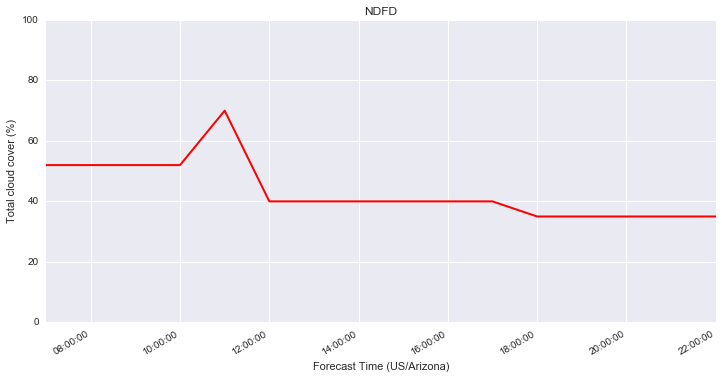

In [34]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100)

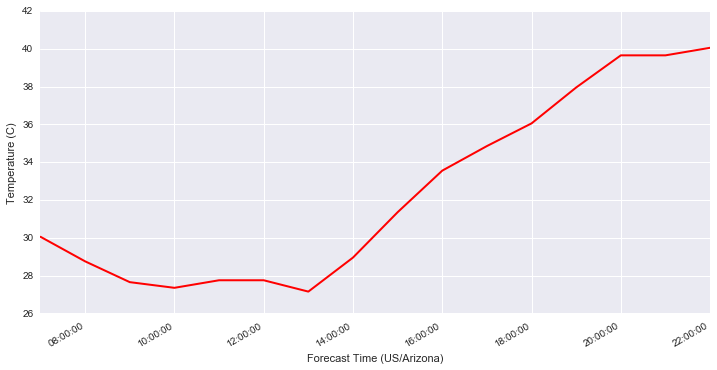

In [36]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temp_air'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

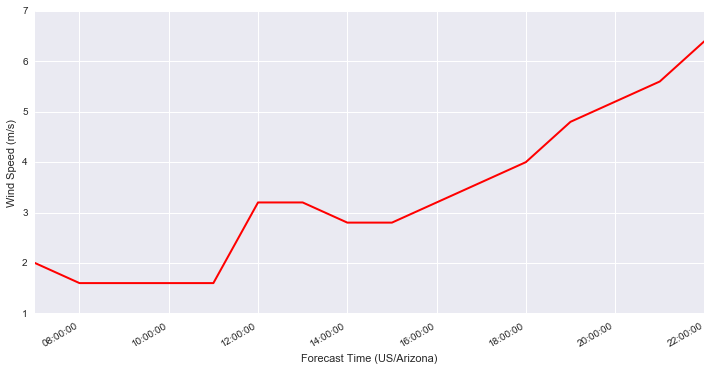

In [37]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

In [38]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds
2016-07-27 07:00:00-07:00,30.050018,2.0,143.988387,143.163497,104.222554,52.0
2016-07-27 08:00:00-07:00,28.750000,1.6,285.328219,177.281221,200.331021,52.0
2016-07-27 09:00:00-07:00,27.649994,1.6,417.431165,177.522093,300.211375,52.0
2016-07-27 10:00:00-07:00,27.350006,1.6,526.891322,170.772024,388.904615,52.0
2016-07-27 11:00:00-07:00,27.750000,1.6,497.912275,75.299590,429.202244,70.0
2016-07-27 12:00:00-07:00,27.750000,3.2,721.296120,250.902795,478.774983,40.0
2016-07-27 13:00:00-07:00,27.149994,3.2,721.328643,250.899698,478.800746,40.0
2016-07-27 14:00:00-07:00,28.950012,2.8,676.149456,255.156679,443.295855,40.0
2016-07-27 15:00:00-07:00,31.350006,2.8,589.073746,262.865948,376.641482,40.0
2016-07-27 16:00:00-07:00,33.550018,3.2,466.677299,270.995730,287.715326,40.0


## RAP

In [39]:
fm = RAP(resolution=20)

In [40]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [41]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

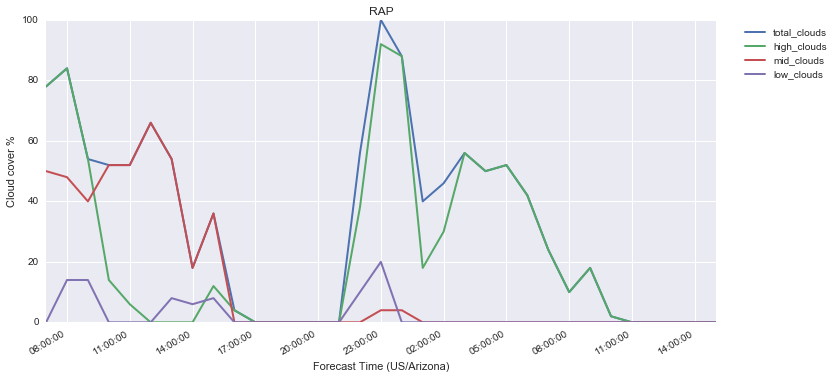

In [42]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [43]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-07-27 07:00:00-07:00,25.910797,2.757028,107.230023,27.943152,99.468388,78.0,0.0,50.0,78.0
2016-07-27 08:00:00-07:00,26.073883,1.539441,195.678263,31.685784,180.486564,84.0,14.0,48.0,84.0
2016-07-27 09:00:00-07:00,27.034576,2.107574,409.233831,164.283273,300.755780,54.0,14.0,40.0,54.0
2016-07-27 10:00:00-07:00,26.773590,1.335156,526.891322,170.772024,388.904615,52.0,0.0,52.0,14.0
2016-07-27 11:00:00-07:00,26.523590,1.463499,604.803516,164.680864,454.534075,52.0,0.0,52.0,6.0
2016-07-27 12:00:00-07:00,26.114655,1.602453,556.567655,88.828571,470.706490,66.0,0.0,66.0,0.0
2016-07-27 13:00:00-07:00,26.664703,1.682302,632.624638,148.998629,488.597664,54.0,8.0,54.0,0.0
2016-07-27 14:00:00-07:00,27.111481,2.301865,806.810775,486.540430,362.798523,18.0,6.0,18.0,0.0
2016-07-27 15:00:00-07:00,29.348053,2.814540,609.770902,299.440687,367.781160,36.0,8.0,36.0,12.0
2016-07-27 16:00:00-07:00,31.296783,1.871677,614.248207,722.774692,136.937420,4.0,0.0,0.0,4.0


## HRRR

In [44]:
fm = HRRR()

In [46]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [47]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

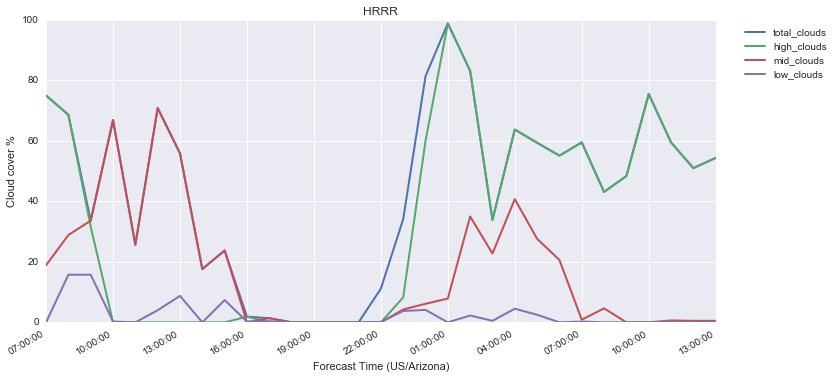

In [48]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time (' + str(data.index.tz) + ')')
plt.title('HRRR')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [49]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2016-07-27 07:00:00-07:00,-8.788116,3.683798,111.471370,37.599771,101.027463,75.000,0.000,18.875,75.000
2016-07-27 08:00:00-07:00,-8.513641,2.235231,238.752264,84.727200,198.129943,68.625,15.750,28.875,68.625
2016-07-27 09:00:00-07:00,-6.579926,1.586132,492.743765,330.711074,274.371607,33.625,15.750,33.625,31.625
2016-07-27 10:00:00-07:00,-6.916046,0.887758,449.936938,90.649614,376.690504,66.875,0.250,66.875,0.000
2016-07-27 11:00:00-07:00,-4.685425,1.578304,761.428845,420.144848,378.051384,25.625,0.000,25.625,0.000
2016-07-27 12:00:00-07:00,-6.816193,1.174678,525.681075,70.693705,457.348963,70.875,4.000,70.875,0.000
2016-07-27 13:00:00-07:00,-7.108551,1.560096,620.744725,138.037424,487.313213,55.875,8.750,55.875,0.000
2016-07-27 14:00:00-07:00,-9.462189,1.620842,809.037931,489.789234,362.060851,17.625,0.000,17.625,0.000
2016-07-27 15:00:00-07:00,-5.107452,2.782871,673.155994,451.408810,308.354862,23.750,7.375,23.750,0.000
2016-07-27 16:00:00-07:00,-2.124542,1.865137,622.959017,754.123038,124.946200,1.875,0.250,0.000,1.875


## HRRR (ESRL)

In [50]:
fm = HRRR_ESRL()

/Users/holmgren/git_repos/pvlib-python/pvlib/forecast.py:742: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  warnings.warn('HRRR_ESRL is an experimental model and is not always available.')


HTTPError: Error accessing http://thredds-jumbo.unidata.ucar.edu/thredds/ncss/grib/HRRR/CONUS_3km/surface/Best/dataset.xml: 404 Not Found

In [51]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

AttributeError: 'HRRR' object has no attribute 'get_query_data'

In [ ]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [ ]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

## Quick power calculation

In [54]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('SandiaMod')
sapm_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = PVSystem(module_parameters=module,
                  inverter_parameters=inverter)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location,
                orientation_strategy='south_at_latitude_tilt')

# extract relevant data for model chain
irradiance = fx_data[['ghi', 'dni', 'dhi']]
weather = fx_data[['wind_speed', 'temp_air']]
mc.run_model(fx_data.index, irradiance=irradiance, weather=weather)

ModelChain for: PVSystem with tilt:32.2 and azimuth: 180 with Module: None and Inverter: None orientation_startegy: south_at_latitude_tilt clearsky_model: ineichen transposition_model: haydavies solar_position_method: nrel_numpy airmass_model: kastenyoung1989

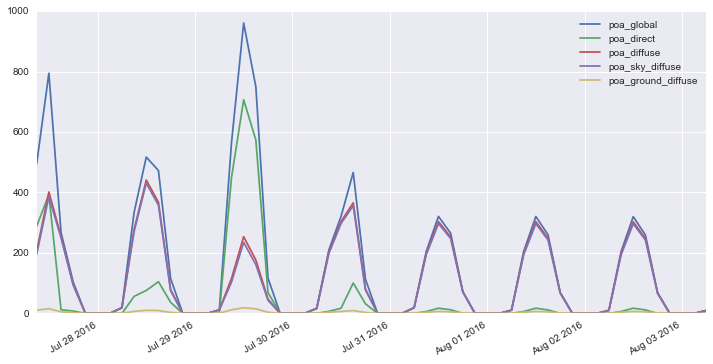

In [55]:
mc.total_irrad.plot()

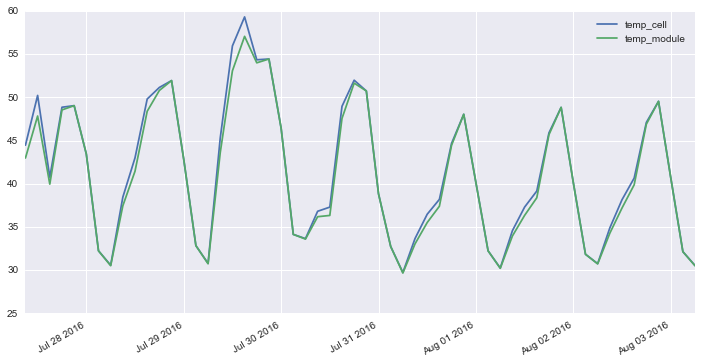

In [56]:
mc.temps.plot()

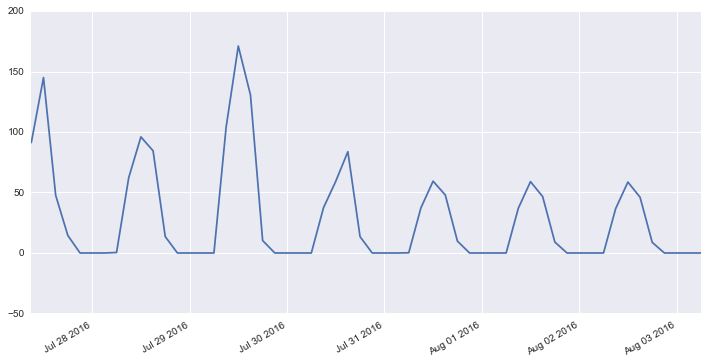

In [57]:
mc.ac.plot()